# Task 7: Time Series Analysis of Retail Sales


**Step 1: Load Dataset**

We will use a retail dataset (e.g., Walmart Sales Forecasting from Kaggle).  

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:/Users/PMLS/OneDrive/Desktop/datasets/Walmart.csv")

# Preview
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
1,6,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
2,7,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
3,8,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
4,9,CA-2011-115812,9/6/2011,14-06-2011,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


Dataset contains fields like Date, Store, Dept, Weekly_Sales, IsHoliday.

**Step 2: Data Preprocessing**

Convert date column to datetime and aggregate by month.

In [4]:
# Convert 'Order Date' to datetime (handles mixed formats)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

# Aggregate monthly sales (using 'Sales' column)
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

monthly_sales.head()


,Order Date,Sales
0,2011-01-01,2648.057
1,2011-02-01,1348.622
2,2011-03-01,11008.898
3,2011-04-01,9343.487
4,2011-05-01,6570.438


We now have clean monthly sales, ready for time series analysis.

**Step 3: Exploratory Trend Analysis**

Plot overall sales trend with moving averages.

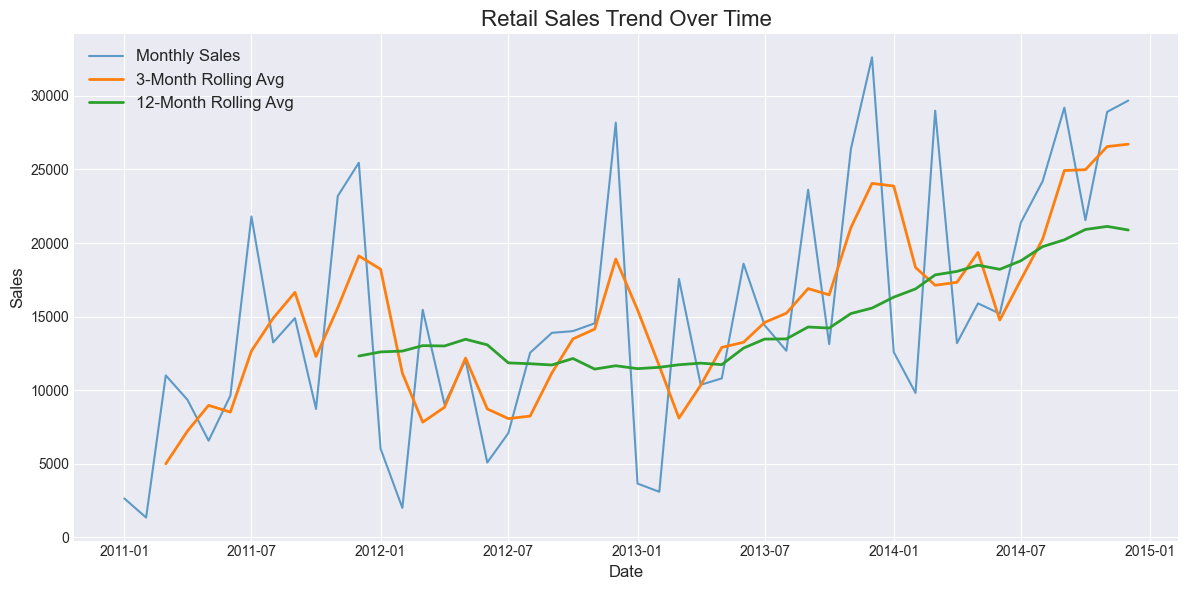

In [7]:
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-darkgrid')

plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label='Monthly Sales', color='tab:blue', alpha=0.7)
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'].rolling(3).mean(), label='3-Month Rolling Avg', color='tab:orange', linewidth=2)
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'].rolling(12).mean(), label='12-Month Rolling Avg', color='tab:green', linewidth=2)

plt.title("Retail Sales Trend Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


We can see an upward trend with strong seasonal spikes around year-end.

**Step 4: Seasonal Patterns**

Examine average sales per month across years.

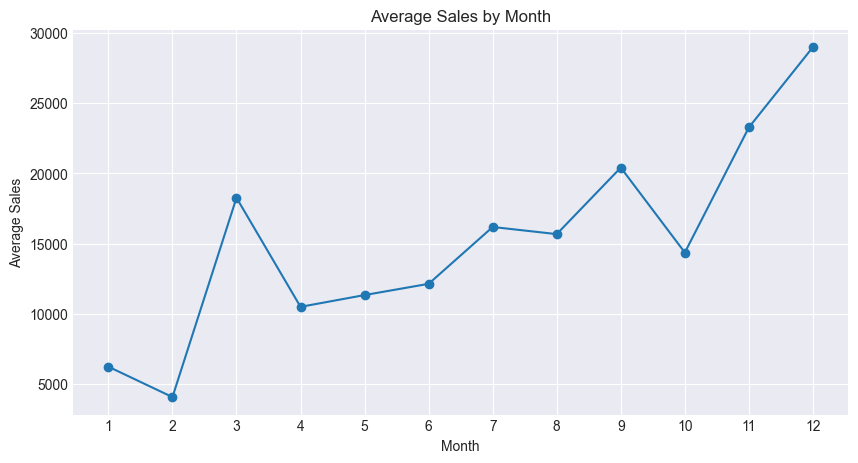

In [11]:
monthly_avg = monthly_sales.groupby('Month')['Sales'].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


Sales are significantly higher in November–December, indicating strong holiday seasonality.

**Step 5: Region & Product Breakdown**

If dataset includes regions/products, break down sales.

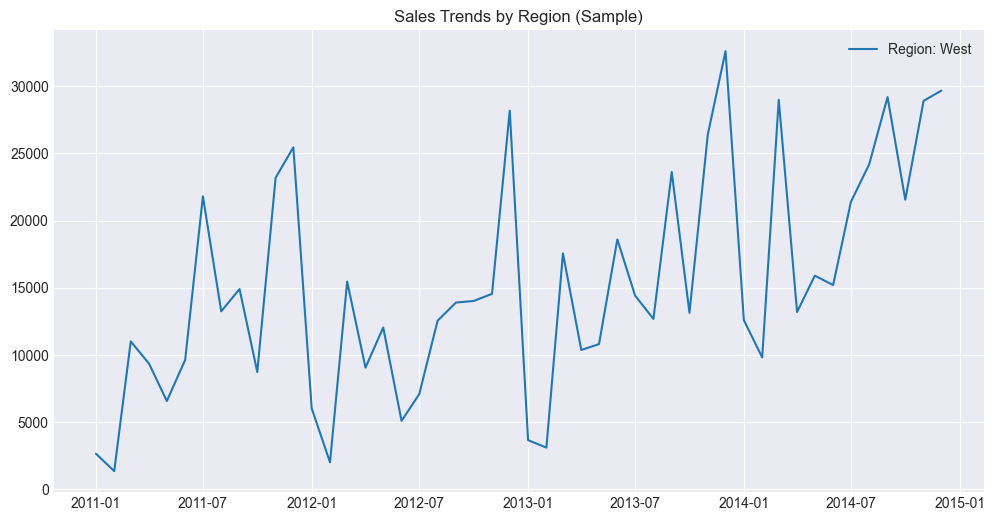

In [13]:
# Example: Region-wise breakdown
region_sales = df.groupby([df['Order Date'].dt.to_period('M'), 'Region'])['Sales'].sum().reset_index()
region_sales['Order Date'] = region_sales['Order Date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
for region in region_sales['Region'].unique()[:5]:  # show first 5 regions
    subset = region_sales[region_sales['Region'] == region]
    plt.plot(subset['Order Date'], subset['Sales'], label=f"Region: {region}")
plt.legend()
plt.title("Sales Trends by Region (Sample)")
plt.show()


Some stores show consistent sales, while others fluctuate more with seasonality.

**Step 6: Simple Forecasting**

C:\Users\PMLS\AppData\Local\Temp\ipykernel_16152\459382738.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales['Order Date'].iloc[-1], periods=12, freq="M"), forecast, label="Forecast", linestyle="--")


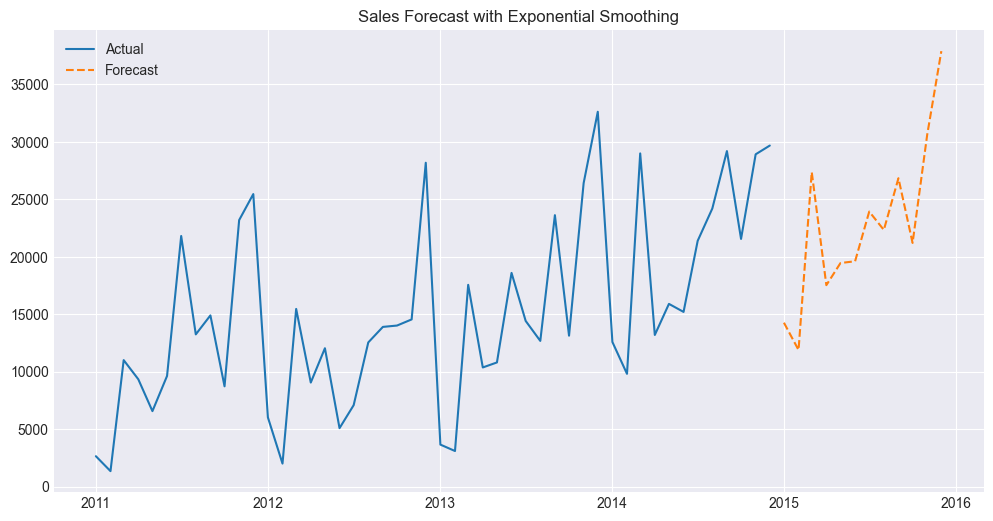

In [16]:


from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train model
model = ExponentialSmoothing(monthly_sales['Sales'], trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()

# Forecast next 12 months
forecast = fit.forecast(12)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label="Actual")
plt.plot(pd.date_range(monthly_sales['Order Date'].iloc[-1], periods=12, freq="M"), forecast, label="Forecast", linestyle="--")
plt.legend()
plt.title("Sales Forecast with Exponential Smoothing")
plt.show()


Forecast predicts continued growth with seasonal peaks around holidays.